In [1]:
import numpy as np
import pandas as pd

### 1. Найти данные для кластеризации. Данные в группе не должны повторяться!
### Внимание, если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать.

In [2]:
data = pd.read_csv('zoo.csv', sep=',')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3


In [3]:
from sklearn import preprocessing
def prepr_ins():
    data.sex.replace({'male': 1, 'female': 0}, inplace=True)
    data.smoker.replace({'yes': 1, 'no': 0}, inplace=True)
    data.region.replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}, inplace=True)
    scaler = preprocessing.MinMaxScaler()
    data.charges = scaler.fit_transform(pd.DataFrame(data.charges))
    return data

In [4]:
def prepr_zoo():
    data.drop(['animal_name', 'class_type'], inplace=True, axis=1)
    return data

In [5]:
data_reshaped = prepr_zoo()
data_reshaped.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1
1,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0
2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1
3,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
4,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0


### 2. Провести кластеризацию данных с помощью алгоритма k-means.
### Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.

In [6]:
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

models = []
score1 = []
score2 = []
max_clusters = 10
times = []
for i in range(3, max_clusters):
    means_model = KMeans(n_clusters=i, random_state=123, init='k-means++')
    start_time = datetime.now()
    means_model.fit(data_reshaped)
    fit_time = datetime.now() - start_time
    models.append(means_model)
    score1.append(means_model.inertia_)
    score2.append(silhouette_score(data_reshaped, means_model.labels_))
    times.append(fit_time)
avg_time_means = pd.Series(times).mean()

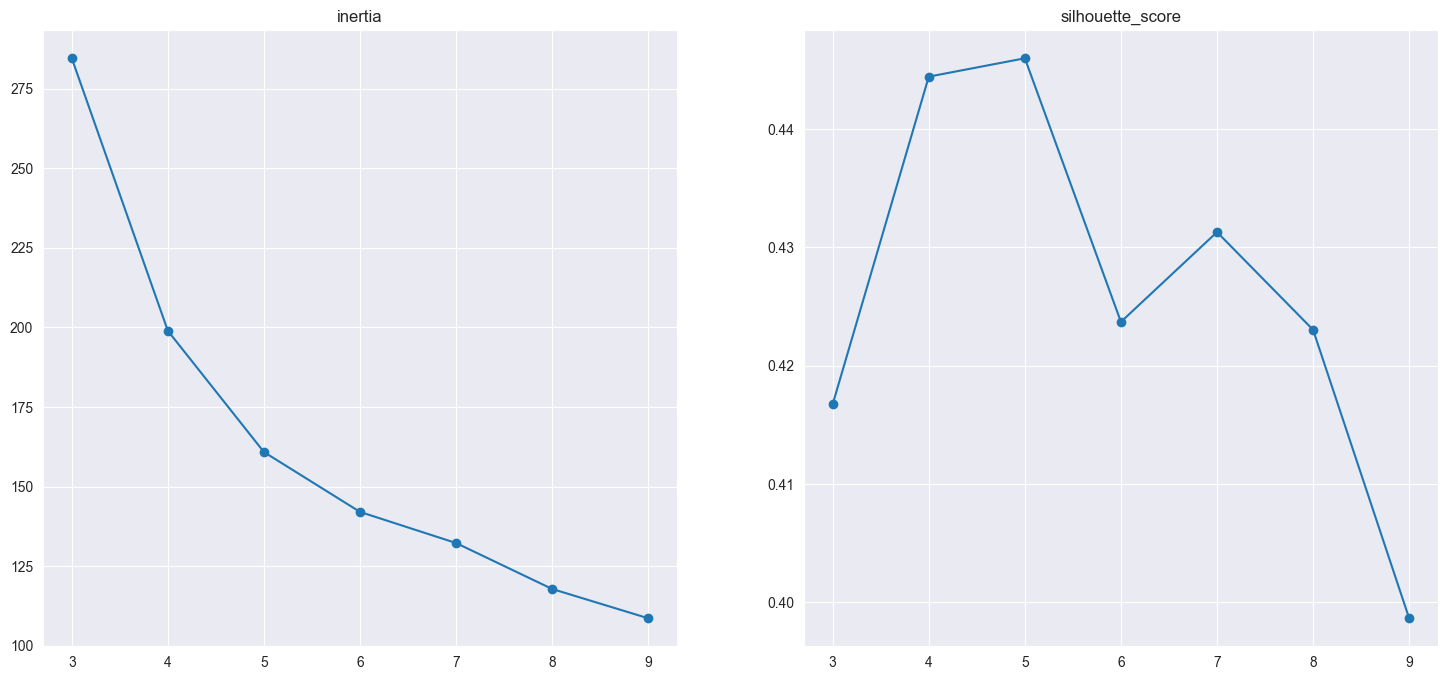

In [22]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.set_title('inertia')
ax2.set_title('silhouette_score')

ax1.set_xticks(range(max_clusters))
ax2.set_xticks(range(max_clusters))
plt.grid(True)
ax1.plot(np.arange(3, max_clusters), score1, marker='o')
ax2.plot(np.arange(3, max_clusters), score2, marker='o');

In [9]:
best_model_means = models[3]

### 3. Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

In [10]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(5, compute_distances=True)
start_time = datetime.now()
clastering = model2.fit(data_reshaped)
fit_time_clastering = datetime.now() - start_time

### 4. Провести кластеризацию данных с помощью алгоритма DBSCAN.

In [11]:
from sklearn.cluster import DBSCAN
start_time = datetime.now()
model3 = DBSCAN(eps=1.5, min_samples=10).fit(data_reshaped)
fit_time_dbscan = datetime.now() - start_time

### 5. Сравнить скорость работы алгоритмов. Результаты изобразить в виде таблицы.

In [12]:
df_times = pd.DataFrame({'k-means': [avg_time_means], 'clastering': [fit_time_clastering], 'dbscan': [fit_time_dbscan]})
df_times

,k-means,clastering,dbscan
0,0 days 00:00:00.024791142,0 days 00:00:00.001009,0 days 00:00:00.001995


### 6. Визуализировать кластеризованные данные с помощью t-SNE или UMAP если данные многомерные.
### Если данные трехмерные, то можно использовать трехмерный точечный график.

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns

def t_sne_preproc(perp: int):
    tsne = TSNE(init='random', n_components=2, perplexity=perp, random_state=123, learning_rate='auto')
    tsne_features = tsne.fit_transform(data_reshaped)
    return tsne_features


def draw_plot(data, labels, tsne_features):
    plt_data = data.copy()
    plt_data['x'] = tsne_features[:, 0]
    plt_data['y'] = tsne_features[:, 1]
    g = sns.scatterplot(x='x', y='y', hue=labels, data=plt_data)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

features = t_sne_preproc(50)

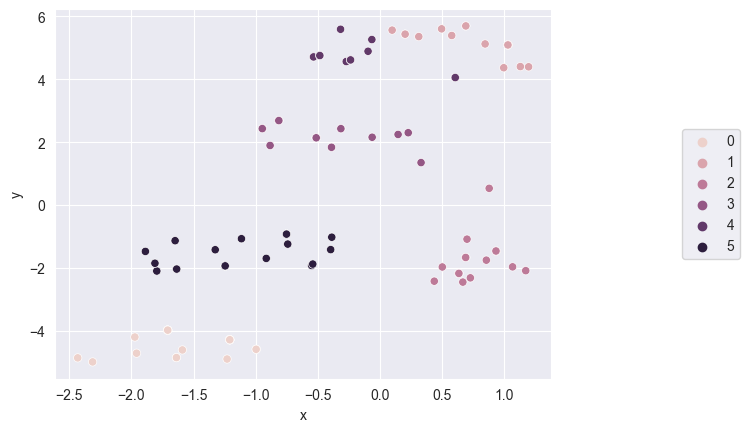

In [14]:
draw_plot(data_reshaped, best_model_means.labels_, features)

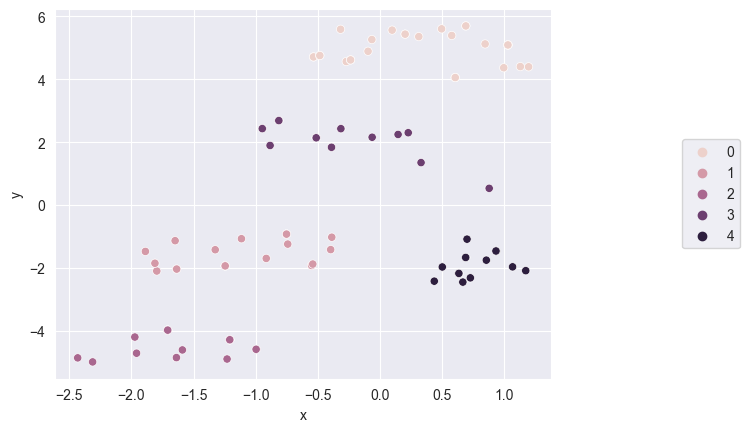

In [15]:
draw_plot(data_reshaped, clastering.labels_, features)

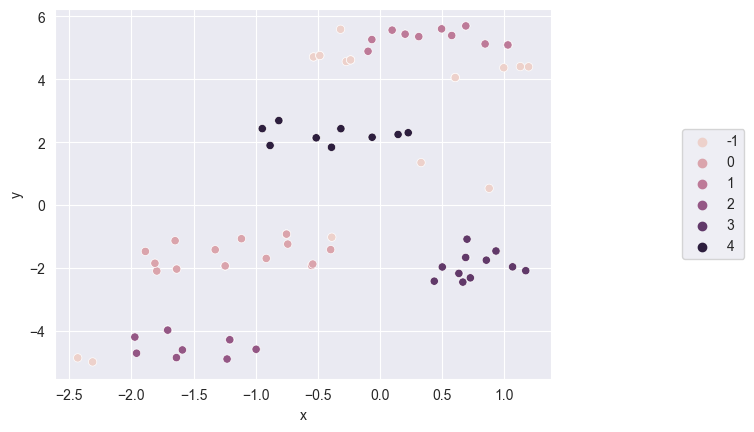

In [16]:
draw_plot(data_reshaped, model3.labels_, features)